## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  12.542979   597.122102  0.298037  6.942188   178.346798
1  90.977059  1459.191996  0.083035  7.069102   151.595275
2  19.244779  1524.186384  0.350535  7.428131   534.556487
3  10.726546  1486.608082  0.693424  1.674635  1030.924882
4  89.596547   725.229075  0.631157  3.519246   466.247077


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9754384	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9639405	total: 58.6ms	remaining: 29.2s
2:	learn: 0.9542810	total: 59ms	remaining: 19.6s
3:	learn: 0.9448548	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9325979	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9211956	total: 60.4ms	remaining: 10s
6:	learn: 0.9102438	total: 60.8ms	remaining: 8.63s
7:	learn: 0.8990765	total: 61.3ms	remaining: 7.6s
8:	learn: 0.8874546	total: 61.7ms	remaining: 6.79s
9:	learn: 0.8769622	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8668720	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8537149	total: 63.1ms	remaining: 5.2s
12:	learn: 0.8433163	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8313449	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8202531	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8109203	total: 65.3ms	remaining: 4.01s
16:	learn: 0.8012355	total: 65.8ms	remaining: 3.8s
17:	learn: 0.7909316	total: 66.2ms	remaining: 3.61s
18:	learn: 0.7834647	total: 66.8ms	remaining: 3.45s

92:	learn: 0.3409879	total: 101ms	remaining: 984ms
93:	learn: 0.3375167	total: 101ms	remaining: 977ms
94:	learn: 0.3339366	total: 102ms	remaining: 972ms
95:	learn: 0.3306004	total: 103ms	remaining: 972ms
96:	learn: 0.3269004	total: 104ms	remaining: 965ms
97:	learn: 0.3235639	total: 104ms	remaining: 958ms
98:	learn: 0.3205691	total: 105ms	remaining: 952ms
99:	learn: 0.3167805	total: 105ms	remaining: 946ms
100:	learn: 0.3131607	total: 105ms	remaining: 938ms
101:	learn: 0.3104005	total: 106ms	remaining: 932ms
102:	learn: 0.3069331	total: 106ms	remaining: 926ms
103:	learn: 0.3038349	total: 107ms	remaining: 922ms
104:	learn: 0.3010647	total: 108ms	remaining: 917ms
105:	learn: 0.2973696	total: 108ms	remaining: 910ms
106:	learn: 0.2948207	total: 108ms	remaining: 905ms
107:	learn: 0.2918903	total: 109ms	remaining: 900ms
108:	learn: 0.2884013	total: 109ms	remaining: 895ms
109:	learn: 0.2857859	total: 110ms	remaining: 889ms
110:	learn: 0.2829451	total: 110ms	remaining: 884ms
111:	learn: 0.279873

273:	learn: 0.0698647	total: 185ms	remaining: 491ms
274:	learn: 0.0694086	total: 186ms	remaining: 490ms
275:	learn: 0.0689060	total: 186ms	remaining: 488ms
276:	learn: 0.0683361	total: 186ms	remaining: 487ms
277:	learn: 0.0677696	total: 187ms	remaining: 485ms
278:	learn: 0.0672476	total: 187ms	remaining: 484ms
279:	learn: 0.0667376	total: 188ms	remaining: 483ms
280:	learn: 0.0661925	total: 188ms	remaining: 482ms
281:	learn: 0.0656981	total: 189ms	remaining: 481ms
282:	learn: 0.0653074	total: 189ms	remaining: 479ms
283:	learn: 0.0648477	total: 190ms	remaining: 478ms
284:	learn: 0.0644158	total: 190ms	remaining: 477ms
285:	learn: 0.0640135	total: 190ms	remaining: 475ms
286:	learn: 0.0635974	total: 191ms	remaining: 474ms
287:	learn: 0.0631393	total: 191ms	remaining: 473ms
288:	learn: 0.0626894	total: 192ms	remaining: 472ms
289:	learn: 0.0622820	total: 192ms	remaining: 471ms
290:	learn: 0.0618058	total: 193ms	remaining: 470ms
291:	learn: 0.0613252	total: 193ms	remaining: 469ms
292:	learn: 

496:	learn: 0.0210965	total: 281ms	remaining: 285ms
497:	learn: 0.0209690	total: 282ms	remaining: 284ms
498:	learn: 0.0208809	total: 282ms	remaining: 283ms
499:	learn: 0.0208373	total: 283ms	remaining: 283ms
500:	learn: 0.0207246	total: 283ms	remaining: 282ms
501:	learn: 0.0206391	total: 283ms	remaining: 281ms
502:	learn: 0.0205296	total: 284ms	remaining: 280ms
503:	learn: 0.0204866	total: 284ms	remaining: 280ms
504:	learn: 0.0203767	total: 285ms	remaining: 279ms
505:	learn: 0.0203158	total: 285ms	remaining: 278ms
506:	learn: 0.0202099	total: 285ms	remaining: 278ms
507:	learn: 0.0201677	total: 286ms	remaining: 277ms
508:	learn: 0.0200643	total: 286ms	remaining: 276ms
509:	learn: 0.0200225	total: 287ms	remaining: 276ms
510:	learn: 0.0198936	total: 287ms	remaining: 275ms
511:	learn: 0.0197935	total: 288ms	remaining: 275ms
512:	learn: 0.0197018	total: 289ms	remaining: 274ms
513:	learn: 0.0196430	total: 289ms	remaining: 273ms
514:	learn: 0.0195186	total: 290ms	remaining: 273ms
515:	learn: 

708:	learn: 0.0101247	total: 366ms	remaining: 150ms
709:	learn: 0.0100953	total: 366ms	remaining: 150ms
710:	learn: 0.0100558	total: 366ms	remaining: 149ms
711:	learn: 0.0100269	total: 367ms	remaining: 148ms
712:	learn: 0.0100182	total: 367ms	remaining: 148ms
713:	learn: 0.0099836	total: 368ms	remaining: 147ms
714:	learn: 0.0099552	total: 368ms	remaining: 147ms
715:	learn: 0.0099226	total: 369ms	remaining: 146ms
716:	learn: 0.0098981	total: 369ms	remaining: 146ms
717:	learn: 0.0098577	total: 370ms	remaining: 145ms
718:	learn: 0.0098275	total: 370ms	remaining: 145ms
719:	learn: 0.0097966	total: 370ms	remaining: 144ms
720:	learn: 0.0097704	total: 371ms	remaining: 143ms
721:	learn: 0.0097407	total: 371ms	remaining: 143ms
722:	learn: 0.0097114	total: 372ms	remaining: 142ms
723:	learn: 0.0097010	total: 372ms	remaining: 142ms
724:	learn: 0.0096568	total: 372ms	remaining: 141ms
725:	learn: 0.0096054	total: 373ms	remaining: 141ms
726:	learn: 0.0095768	total: 373ms	remaining: 140ms
727:	learn: 

918:	learn: 0.0051610	total: 460ms	remaining: 40.5ms
919:	learn: 0.0051409	total: 461ms	remaining: 40.1ms
920:	learn: 0.0051367	total: 461ms	remaining: 39.6ms
921:	learn: 0.0051260	total: 462ms	remaining: 39ms
922:	learn: 0.0051154	total: 462ms	remaining: 38.5ms
923:	learn: 0.0050923	total: 463ms	remaining: 38ms
924:	learn: 0.0050881	total: 463ms	remaining: 37.5ms
925:	learn: 0.0050841	total: 464ms	remaining: 37ms
926:	learn: 0.0050713	total: 464ms	remaining: 36.5ms
927:	learn: 0.0050592	total: 464ms	remaining: 36ms
928:	learn: 0.0050427	total: 465ms	remaining: 35.5ms
929:	learn: 0.0050227	total: 465ms	remaining: 35ms
930:	learn: 0.0049982	total: 466ms	remaining: 34.5ms
931:	learn: 0.0049743	total: 466ms	remaining: 34ms
932:	learn: 0.0049552	total: 466ms	remaining: 33.5ms
933:	learn: 0.0049452	total: 467ms	remaining: 33ms
934:	learn: 0.0049218	total: 467ms	remaining: 32.5ms
935:	learn: 0.0049014	total: 468ms	remaining: 32ms
936:	learn: 0.0048744	total: 468ms	remaining: 31.5ms
937:	lear

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

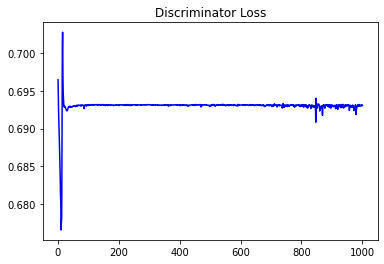

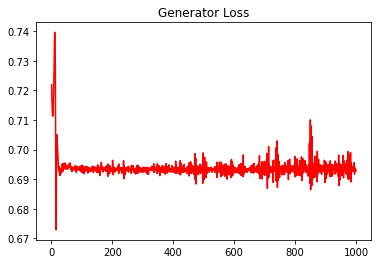

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.029993283501904486


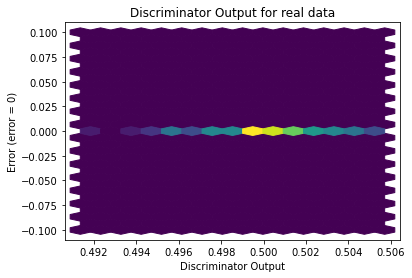

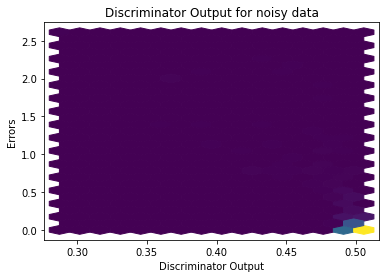

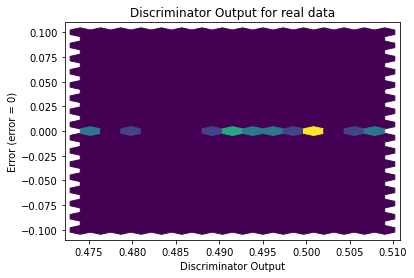

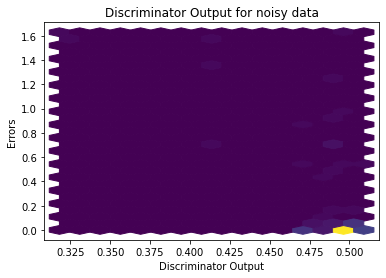

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


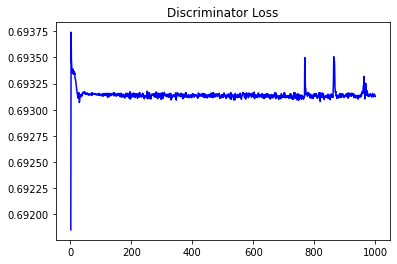

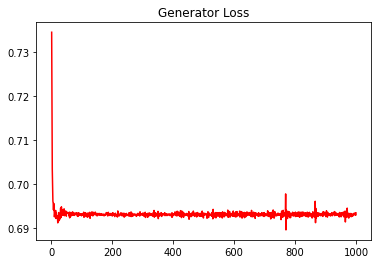

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.04044790570502527


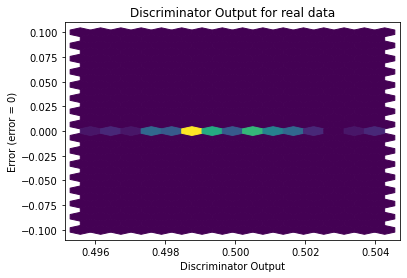

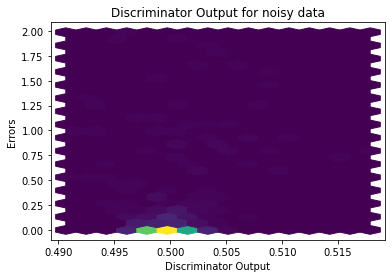

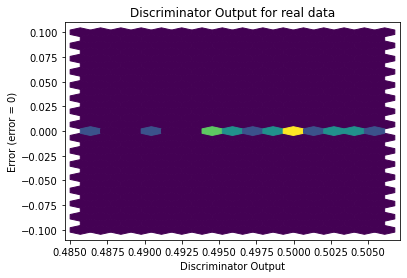

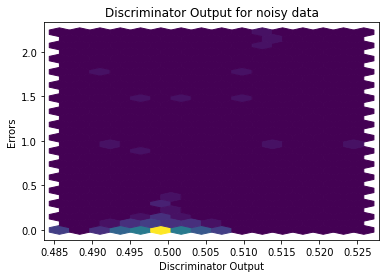

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
